# For this project, I'm using a support vector machine

In the csv, shirt colors are enumerated as blue: 0, grey: 1, other: 2. First I use a simple SVM, then I use PCA and SVM on the largest PCs

In [96]:
import pandas as pd                                         # to load data, data manipulation
import numpy as np                                          # for data manipulation
import matplotlib.pyplot as plt                             # for making plots, data visualization
import matplotlib.colors as colors                           
from sklearn.utils import resample                          # for downsampling dataset
from sklearn.model_selection import train_test_split        # to split data into train and test sets
from sklearn.preprocessing import scale                     # to scale and center data
from sklearn.svm import SVC                                 # to build SVM 
from sklearn.model_selection import GridSearchCV            # for cross-validation
from sklearn.metrics import confusion_matrix                # to make a confusion matrix
from sklearn.metrics import plot_confusion_matrix           # to draw the confusion matrix
from sklearn.decomposition import PCA                       # to perform PCA on data

## importing bowtie data from csv

In [97]:
! ls

Clustering exercises.ipynb        bowtie.csv
Concrete_Data_Yeh.csv             bowtie_num.csv
Image Classification.ipynb        lecture 3 notes.ipynb
Linear regression exercises.ipynb lecture 4 notes.ipynb
bowtie project with SVM.ipynb     numpy_exercises.ipynb


In [98]:
col_names = ['weekday', 'day', 'month', 'shirt_color', 'battery', 'temp', 'wind_mph', 'bowtie']
df = pd.read_csv('bowtie_num.csv', header=None, names=col_names, index_col=False)

/var/folders/pd/d2605qwd41nfttvp38cwclvm0000gn/T/ipykernel_4016/1286545348.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv('bowtie_num.csv', header=None, names=col_names, index_col=False)


In [100]:
df

,weekday,day,month,shirt_color,battery,temp,wind_mph,bowtie
0,tues,17,1,0,65,42,17,1
1,thurs,19,1,2,100,43,23,1
2,tues,24,1,0,86,40,6,1
3,thurs,26,1,1,87,24,20,1
4,tues,31,1,1,43,20,6,0
5,thurs,2,2,0,35,39,15,0
6,tues,7,2,0,78,48,16,0
7,thurs,9,2,1,63,42,35,1
8,tues,14,2,0,97,55,15,1
9,thurs,16,2,1,48,40,13,1


In [101]:
df.dtypes

weekday        object
day             int64
month           int64
shirt_color     int64
battery         int64
temp            int64
wind_mph        int64
bowtie          int64
dtype: object

In [102]:
df['weekday'].replace(['tues', 'thurs'], [0, 1], inplace=True)
df.head()

,weekday,day,month,shirt_color,battery,temp,wind_mph,bowtie
0,0,17,1,0,65,42,17,1
1,1,19,1,2,100,43,23,1
2,0,24,1,0,86,40,6,1
3,1,26,1,1,87,24,20,1
4,0,31,1,1,43,20,6,0


## splitting data into dependent and independent variables

In [103]:
X = df.drop('bowtie', axis=1).copy()
X.head()

,weekday,day,month,shirt_color,battery,temp,wind_mph
0,0,17,1,0,65,42,17
1,1,19,1,2,100,43,23
2,0,24,1,0,86,40,6
3,1,26,1,1,87,24,20
4,0,31,1,1,43,20,6


In [104]:
y = df['bowtie'].copy()
y.head()

0    1
1    1
2    1
3    1
4    0
Name: bowtie, dtype: int64

### scaling the data

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [114]:
X_test

,weekday,day,month,shirt_color,battery,temp,wind_mph
14,0,7,3,0,45,38,12
17,1,23,3,0,65,61,22
13,1,2,3,2,97,51,17
0,0,17,1,0,65,42,17
9,1,16,2,1,48,40,13
22,0,11,4,2,78,79,18
25,1,20,4,0,100,79,8


In [106]:
start_svm = SVC(random_state=1)
start_svm.fit(X_train, y_train)

SVC(random_state=1)

/Users/karlanrobles/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


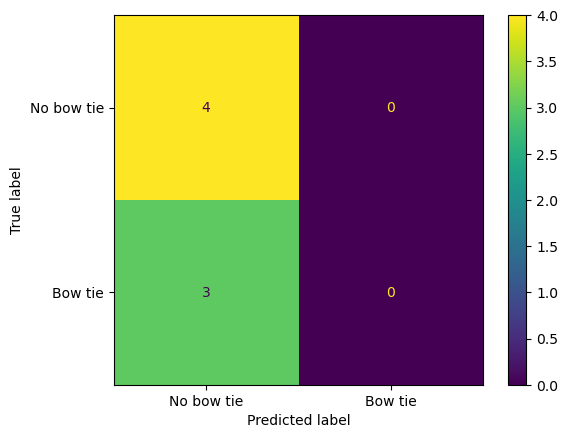

In [107]:
plot_confusion_matrix(start_svm,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['No bow tie', 'Bow tie'])

In [121]:
# testing on tuesday may 2 data
may_2_test = np.array([0, 2, 5, 0, 86, 62, 11])
may_2_bowtie = 0

may_2_bowtie_pred = start_svm.predict(may_2_test.reshape(1, -1))
print(may_2_bowtie_pred)

[0]


/Users/karlanrobles/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


This prediction was no bow tie - which is correct! However, theres a few false negatives in the confusion matrix. 

## improving SVM by parameter sweep/cross validation

In [122]:
param_grid = [{'C': [0.1, 1, 10, 100, 1000],
              'gamma': ['scale', 10, 1, 0.1, 0.01, 0.001, 0.0001,'auto'], 
              'kernel': ['poly', 'rbf', 'sigmoid']}]

In [123]:
optimal_params = GridSearchCV(SVC(),
                             param_grid,
                             cv=5,
                             scoring='accuracy',
                             verbose=0)

In [124]:
optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 'scale', 'kernel': 'poly'}


In [125]:
opt_SVM = SVC(random_state=2, C=0.1, gamma=0.001, kernel='poly')

In [126]:
opt_SVM.fit(X_train, y_train)

SVC(C=0.1, gamma=0.001, kernel='poly', random_state=2)

/Users/karlanrobles/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


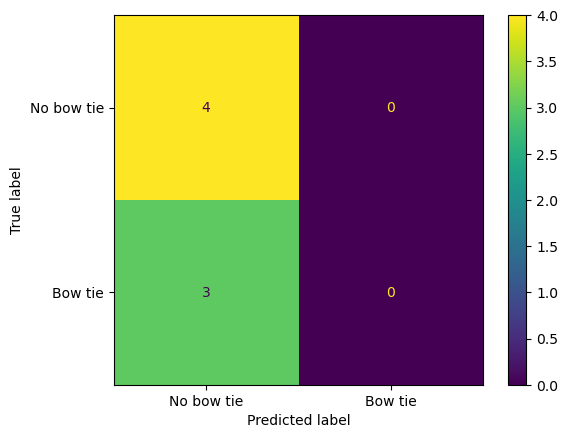

In [127]:
plot_confusion_matrix(opt_SVM,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['No bow tie', 'Bow tie'])

In [128]:
# testing on tuesday may 2 data
opt_SVM.predict(may_2_test.reshape(1, -1))

/Users/karlanrobles/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

Also predicted no bowtie! Let's see what PCA does

## PCA

In [77]:
pca = PCA()
X_train_PCA = pca.fit_transform(X_train)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1, len(per_var) + 1)]

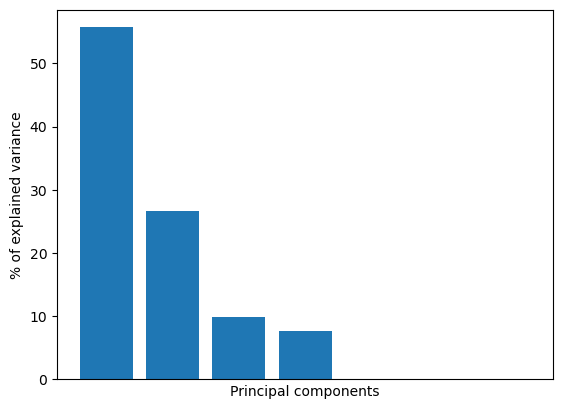

In [78]:
plt.bar(x=range(1, len(per_var) +1), height=per_var)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.ylabel('% of explained variance')
plt.xlabel('Principal components')
plt.show()

Now, I use the two largest principal components

In [79]:
PC_train_feat_1 = X_train_PCA[:,0]   #x-coordinates after PCA
PC_train_feat_2 = X_train_PCA[:,1]   #y-coordinates after PCA

In [80]:
PCA_train_scaled = scale(np.column_stack((PC_train_feat_1, PC_train_feat_2)))

In [81]:
param_grid = [{'C': [1, 10, 100, 1000],
              'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['poly', 'rbf', 'sigmoid']}]

In [82]:
optimal_params = GridSearchCV(SVC(),
                             param_grid,
                             cv=5,
                             scoring='accuracy',
                             verbose=2)

In [83]:
optimal_params.fit(PCA_train_scaled, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=scale, k

[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END ....................C=10, gamma=0.0001, kernel=poly; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1000, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=1000, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['poly', 'rbf', 'sigmoid']}],
             scoring='accuracy', verbose=2)

In [84]:
print(optimal_params.best_params_)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [85]:
PCA_svm = SVC(random_state=2, C=10, gamma='scale', kernel='rbf')

In [95]:
PCA_svm.fit(PCA_train_scaled, y_train)

SVC(C=10, random_state=2)

In [151]:
X_test

,weekday,day,month,shirt_color,battery,temp,wind_mph
14,0,7,3,0,45,38,12
17,1,23,3,0,65,61,22
13,1,2,3,2,97,51,17
0,0,17,1,0,65,42,17
9,1,16,2,1,48,40,13
22,0,11,4,2,78,79,18
25,1,20,4,0,100,79,8


In [157]:
may_2_test = may_2_test.reshape(1,-1)

In [162]:
may_2_test[0]

array([ 0,  2,  5,  0, 86, 62, 11])

In [131]:
PCA_test_scaled = pca.transform(X_test)

PC_test_feat_1 = PCA_test_scaled[:,0]   #x-coordinates after PCA
PC_test_feat_2 = PCA_test_scaled[:,1]   #y-coordinates after PCA

In [164]:
PCA_may_scaled = pca.transform(may_2_test[0].reshape(-1, 1))

In [142]:
PCA_test_scaled

array([[ 31.23428878,   2.4376292 ,  -8.96494058, -14.5592895 ,
          0.64854119,   0.80661814,   0.062472  ],
       [  5.57083701,  11.09205301,  -0.5277511 ,   7.36531392,
          0.34475991,   0.44441349,  -0.56228048],
       [-20.61141296, -12.1320184 ,  -9.42262179,  -9.62178276,
         -0.5044678 ,  -0.40991171,  -0.52977868],
       [ 13.93730613,  -4.98501124,  -4.09310737,  -1.74771251,
          1.3558308 ,  -0.72544368,   0.05444767],
       [ 29.37533029,   1.77218733,  -3.45544863,  -6.74081414,
         -0.33319469,  -0.22872731,  -0.70084742],
       [-16.31033643,  20.63071725,  -0.82674524,  -1.79183756,
         -1.07001025,  -0.93158346,   0.61685925],
       [-32.87816165,   7.86632424,  14.12480913,   0.21899244,
          0.59370052,  -0.2074398 ,  -0.684181  ]])

In [165]:
PCA_may_scaled

array([[-23.71428571],
       [-21.71428571],
       [-18.71428571],
       [-23.71428571],
       [ 62.28571429],
       [ 38.28571429],
       [-12.71428571]])

I found a tutorial to make this cool plot showing the SVM decision regions. Here, we make a matrix so we can show the 'decision regions'. We make this matrix slightly larger than the transformed PCA points so they'll fit inside the region. 

In [132]:
x_min = PC_test_feat_1.min() - 1
x_max = PC_test_feat_1.max() + 1

y_min = PC_test_feat_2.min() - 1
y_max = PC_test_feat_2.max() + 1

In [133]:
xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                    np.arange(start=y_min, stop=y_max, step=0.1))

In [134]:
z = PCA_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))

In [135]:
z = z.reshape(xx.shape)

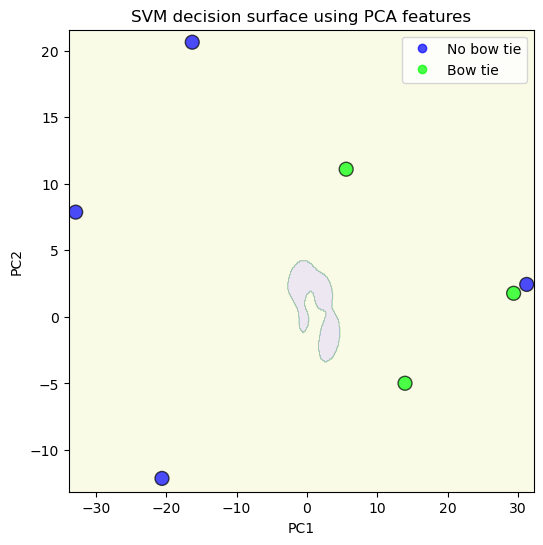

In [137]:
fig, ax = plt.subplots(figsize=(6,6))

ax.contourf(xx, yy, z, alpha=0.1)
cmap = colors.ListedColormap(['#0000FF', '#00FF00'])

scatter = ax.scatter(PC_test_feat_1, PC_test_feat_2,
                    c = y_test, 
                    cmap = cmap,
                    s = 100,
                    edgecolors = 'k',
                    alpha = 0.7)



legend = ax.legend(scatter.legend_elements()[0],
                  scatter.legend_elements()[1],
                  loc='upper right')
legend.get_texts()[0].set_text('No bow tie')
legend.get_texts()[1].set_text('Bow tie')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('SVM decision surface using PCA features')

plt.show()

Ideally, the green dots would fall within the pink region in the center and the blue dots would be localized to the outer regions. Perhaps with more data!

In [177]:
PCA_may_scaled[0][0]

-23.714285714285715

In [179]:
bowtie_PCA_pred = PCA_svm.predict(np.column_stack((PCA_may_scaled[0][0], PCA_may_scaled[1][0])))
bowtie_PCA_pred

array([1])

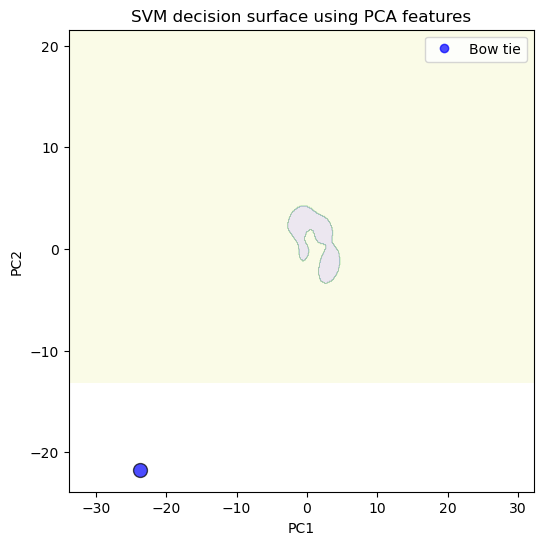

In [182]:
fig, ax = plt.subplots(figsize=(6,6))

ax.contourf(xx, yy, z, alpha=0.1)
cmap = colors.ListedColormap(['#0000FF', '#00FF00'])

scatter = ax.scatter(PCA_may_scaled[0], PCA_may_scaled[1],
                    c = bowtie_PCA_pred, 
                    cmap = cmap,
                    s = 100,
                    edgecolors = 'k',
                    alpha = 0.7)



legend = ax.legend(scatter.legend_elements()[0],
                  scatter.legend_elements()[1],
                  loc='upper right')
legend.get_texts()[0].set_text('Bow tie')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('SVM decision surface using PCA features')

plt.show()

After all that, looks like PCA is incorrectly predicting bow tie and the simpler SVM models did better. Thanks for a fun project. The bowtie project was a cool way to think about machine learning without the flood of scary data. I hope I can take another course with you in the future! 